In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings

In [5]:
df = pd.read_csv('deliveries dataset if.csv')

In [7]:
df1 = pd.read_csv('matches data set if.csv')

In [9]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [11]:
df1.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [17]:
team_performance=df1.melt(
    id_vars=["id","season","date","winner","result_margin","result","target_runs"],
    value_vars=["team1","team2"],
    var_name="home_away",
    value_name="team"
)
team_performance["is_winner"]=(team_performance["team"]==team_performance["winner"]).astype(int)
team_performance["runs_scored"]=team_performance["target_runs"]
team_performance["runs_conceded"]=team_performance.groupby("id")["target_runs"].transform("sum")-team_performance["target_runs"]
team_performance.head(5)

,id,season,date,winner,result_margin,result,target_runs,home_away,team,is_winner,runs_scored,runs_conceded
0,335982,2007/08,2008-04-18,Kolkata Knight Riders,140.0,runs,223.0,team1,Royal Challengers Bangalore,0,223.0,223.0
1,335983,2007/08,2008-04-19,Chennai Super Kings,33.0,runs,241.0,team1,Kings XI Punjab,0,241.0,241.0
2,335984,2007/08,2008-04-19,Delhi Daredevils,9.0,wickets,130.0,team1,Delhi Daredevils,1,130.0,130.0
3,335985,2007/08,2008-04-20,Royal Challengers Bangalore,5.0,wickets,166.0,team1,Mumbai Indians,0,166.0,166.0
4,335986,2007/08,2008-04-20,Kolkata Knight Riders,5.0,wickets,111.0,team1,Kolkata Knight Riders,1,111.0,111.0


In [19]:
team_performance_agg =team_performance.groupby(["team" ,"date"]).agg({
    "is_winner":"sum",
    "runs_scored":"sum",
    "runs_conceded":"sum"
}).sort_values("date").reset_index()

team_performance_agg["net_run_rate"] =team_performance_agg["runs_scored"] - team_performance_agg["runs_conceded"]
team_performance_agg

,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
0,Royal Challengers Bangalore,2008-04-18,0,223.0,223.0,0.0
1,Kolkata Knight Riders,2008-04-18,1,223.0,223.0,0.0
2,Delhi Daredevils,2008-04-19,1,130.0,130.0,0.0
3,Rajasthan Royals,2008-04-19,0,130.0,130.0,0.0
4,Kings XI Punjab,2008-04-19,0,241.0,241.0,0.0
...,...,...,...,...,...,...
2185,Royal Challengers Bengaluru,2024-05-22,0,173.0,173.0,0.0
2186,Rajasthan Royals,2024-05-24,0,176.0,176.0,0.0
2187,Sunrisers Hyderabad,2024-05-24,1,176.0,176.0,0.0
2188,Kolkata Knight Riders,2024-05-26,1,114.0,114.0,0.0


In [21]:
team_name = "Chennai Super Kings"
team_data = team_performance_agg[team_performance_agg["team"] ==team_name]
team_data

,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
5,Chennai Super Kings,2008-04-19,1,241.0,241.0,0.0
15,Chennai Super Kings,2008-04-23,1,209.0,209.0,0.0
20,Chennai Super Kings,2008-04-26,1,148.0,148.0,0.0
29,Chennai Super Kings,2008-04-28,1,179.0,179.0,0.0
39,Chennai Super Kings,2008-05-02,0,170.0,170.0,0.0
...,...,...,...,...,...,...
2145,Chennai Super Kings,2024-05-01,0,163.0,163.0,0.0
2153,Chennai Super Kings,2024-05-05,1,168.0,168.0,0.0
2164,Chennai Super Kings,2024-05-10,0,232.0,232.0,0.0
2168,Chennai Super Kings,2024-05-12,1,142.0,142.0,0.0


In [33]:
time_series = team_data['runs_scored']
adf_result = adfuller(time_series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] > 0.05:
    print("The series is not stationary. Differencing is required.")

ADF Statistic: -15.40391105234563
p-value: 3.1883231923543326e-28


In [35]:
time_series = team_data['runs_scored']
adf_result = adfuller(time_series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] > 0.05:
    print("The series is not stationary. Differencing is required.")

ADF Statistic: -15.40391105234563
p-value: 3.1883231923543326e-28


In [45]:
if adf_result[1] >0.05:
  time_series_diff = time_series.diff().dropna()
else:
  time_series_diff = time_series
train_size  = int(len(time_series_diff)*0.8)
train ,test = time_series_diff[:train_size] , time_series_diff[train_size:]
model = ARIMA(train , order =(1,1,1))
fitted_model = model.fit()
forecast  = fitted_model.forecast(steps =len(test))
forecast.index =test.index
forecast.head(5)


C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

date
2021-10-04    164.212293
2021-10-07    163.823458
2021-10-10    163.817595
2021-10-15    163.817507
2022-03-26    163.817505
Name: predicted_mean, dtype: float64

Mean Absolute Error (MAE):  31.69417844434655
Root Mean Squared Error (RMSE):  42.0403290929857


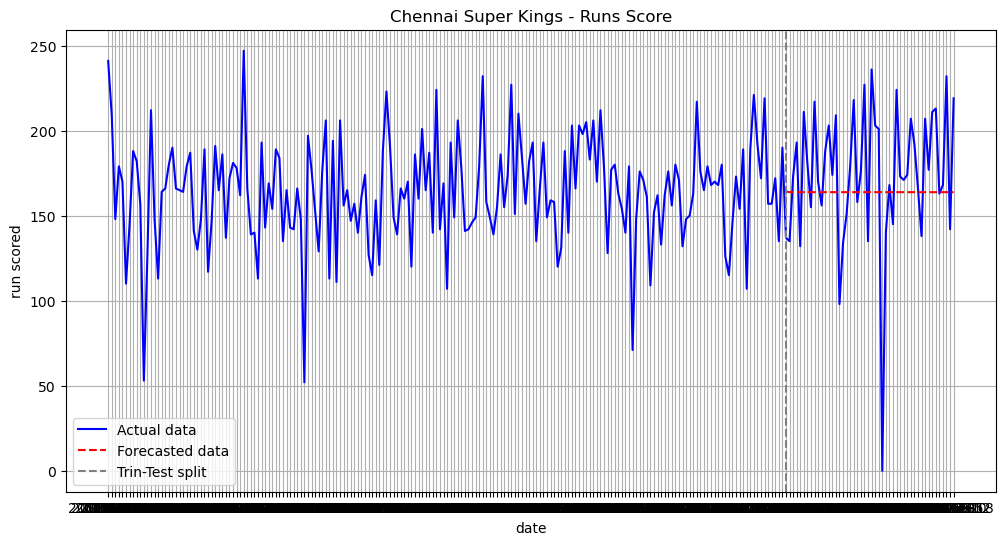

In [49]:
import numpy as np
actual_runs = test.values
forecast_runs = forecast.values

mae = np.mean(np.abs(actual_runs - forecast_runs))
print(f"Mean Absolute Error (MAE): ",mae )
rmse  = np.sqrt(np.mean((actual_runs - forecast_runs)**2))
print(f"Root Mean Squared Error (RMSE): ",rmse )
plt.figure(figsize = (12, 6))
plt.plot(time_series_diff , label ="Actual data" , color ="blue")
plt.plot(forecast ,label ="Forecasted data" , color="red", linestyle ="--")
plt.axvline(x =test.index[0], color="gray", linestyle = "--",label = "Trin-Test split")
plt.title(f"{team_name} - Runs Score")
plt.xlabel("date")
plt.ylabel("run scored")
plt.legend()
plt.grid()
plt.show()

In [69]:
dhoni_scores = df[df['batter'] == 'MS Dhoni']
dhoni_scores = dhoni_scores.groupby('match_id')['batsman_runs'].sum().reset_index()
total_runs = dhoni_scores['batsman_runs'].sum()
dhoni_scores = dhoni_scores.head(240)
dhoni_scores['match_number'] = range(1, len(dhoni_scores) + 1)
dhoni_scores.set_index('match_number', inplace=True)
model = ARIMA(dhoni_scores['batsman_runs'], order=(1, 1, 1))
model_fit = model.fit()
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)
dhoni_scores = df[df['batter'] == 'MS Dhoni']
dhoni_scores = dhoni_scores.groupby('match_id')['batsman_runs'].sum().reset_index()
total_runs = dhoni_scores['batsman_runs'].sum()
dhoni_scores = dhoni_scores.head(240)
dhoni_scores['match_number'] = range(1, len(dhoni_scores) + 1)
dhoni_scores.set_index('match_number', inplace=True)
model = ARIMA(dhoni_scores['batsman_runs'], order=(1, 1, 1))
model_fit = model.fit()

forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

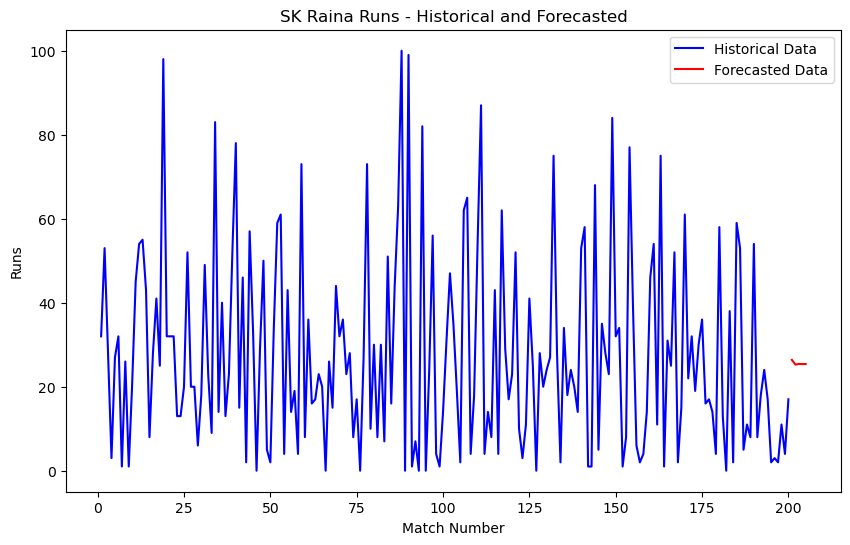

Forecast for SK Raina:
200    26.396030
201    25.281171
202    25.413451
203    25.397756
204    25.399618
Name: predicted_mean, dtype: float64


In [71]:
batter_scores = df.groupby('batter')['batsman_runs'].sum().reset_index()
batter_scores = batter_scores.sort_values(by='batsman_runs', ascending=False).head(5)
forecasts = {}
for batter in batter_scores['batter']:
    player_scores = df[df['batter'] == batter]
    player_scores = player_scores.groupby('match_id')['batsman_runs'].sum().reset_index()
    player_scores = player_scores.head(240)
    player_scores['match_number'] = range(1, len(player_scores) + 1)
    player_scores.set_index('match_number', inplace=True)
    model = ARIMA(player_scores['batsman_runs'], order=(1, 1, 1))
    model_fit = model.fit()
    
    forecast_steps = 5
    forecast = model_fit.forecast(steps=forecast_steps)
    forecasts[batter] = forecast
plt.figure(figsize=(10, 6))
plt.plot(player_scores['batsman_runs'], label='Historical Data', color='blue')
plt.plot(range(len(player_scores) + 1, len(player_scores) + 1 + forecast_steps),
             forecast, label='Forecasted Data', color='red')
plt.title(f'{batter} Runs - Historical and Forecasted')
plt.xlabel('Match Number')
plt.ylabel('Runs')
plt.legend()
plt.show()

print(f"Forecast for {batter}:")
print(forecast)


In [73]:
bowler_stats = df.groupby(['match_id', 'bowler']).agg(
    total_wickets=('is_wicket', 'sum'),
    total_runs=('total_runs', 'sum')
).reset_index()
bowler_stats

,match_id,bowler,total_wickets,total_runs
0,335982,AA Noffke,1,41
1,335982,AB Agarkar,3,25
2,335982,AB Dinda,2,9
3,335982,CL White,0,24
4,335982,I Sharma,1,13
...,...,...,...,...
12973,1426312,PJ Cummins,1,18
12974,1426312,SP Narine,1,20
12975,1426312,Shahbaz Ahmed,1,28
12976,1426312,T Natarajan,0,29


In [75]:
bowler_performance = bowler_stats.groupby('bowler').agg(
    total_wickets=('total_wickets', 'sum'),
    total_runs=('total_runs', 'sum'),
    matches_played=('match_id', 'count')
).reset_index()
bowler_performance['economy_rate'] = bowler_performance['total_runs'] / (bowler_performance['matches_played'] * 6)
bowler_performance['wickets_per_match'] = bowler_performance['total_wickets'] / bowler_performance['matches_played']

C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

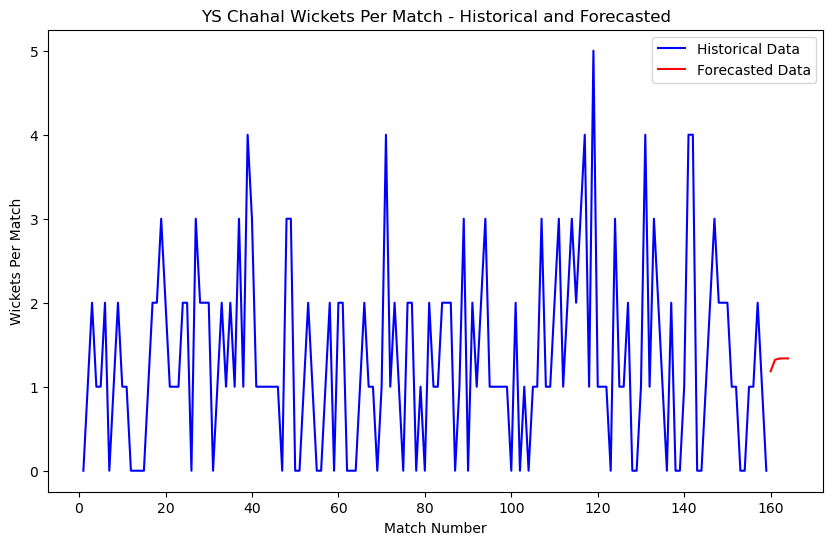

Forecast for YS Chahal:
159    1.184504
160    1.319960
161    1.335451
162    1.337222
163    1.337425
Name: predicted_mean, dtype: float64


In [81]:
top_bowlers = bowler_performance.sort_values(by='total_wickets', ascending=False).head(1)
selected_bowler = top_bowlers.iloc[0]['bowler']
     

selected_bowler_stats = bowler_stats[bowler_stats['bowler'] == selected_bowler]

selected_bowler_stats = selected_bowler_stats.groupby('match_id').agg(
    wickets_per_match=('total_wickets', 'sum')
).reset_index()
selected_bowler_stats['match_number'] = range(1, len(selected_bowler_stats) + 1)
selected_bowler_stats.set_index('match_number', inplace=True)
model = ARIMA(selected_bowler_stats['wickets_per_match'], order=(1, 1, 1))
model_fit = model.fit()

forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(10, 6))
plt.plot(selected_bowler_stats['wickets_per_match'], label='Historical Data', color='blue')
plt.plot(range(len(selected_bowler_stats) + 1, len(selected_bowler_stats) + 1 + forecast_steps),
         forecast, label='Forecasted Data', color='red')
plt.title(f'{selected_bowler} Wickets Per Match - Historical and Forecasted')
plt.xlabel('Match Number')
plt.ylabel('Wickets Per Match')
plt.legend()
plt.show()

print(f"Forecast for {selected_bowler}:")
print(forecast)

In [83]:
top_bowlers = bowler_performance.sort_values(by='total_wickets', ascending=False).head(5)
top_bowlers

,bowler,total_wickets,total_runs,matches_played,economy_rate,wickets_per_match
524,YS Chahal,213,4681,159,4.906709,1.339623
119,DJ Bravo,207,4436,158,4.679325,1.310127
348,PP Chawla,201,5179,191,4.519197,1.052356
446,SP Narine,200,4672,175,4.449524,1.142857
355,R Ashwin,198,5435,208,4.354968,0.951923


<Axes: xlabel='bowler', ylabel='total_wickets'>

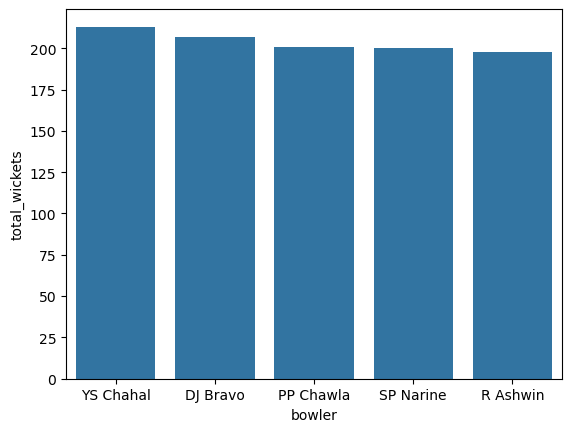

In [85]:
import seaborn as sns
sns.barplot(x='bowler',y='total_wickets',data=top_bowlers)

C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

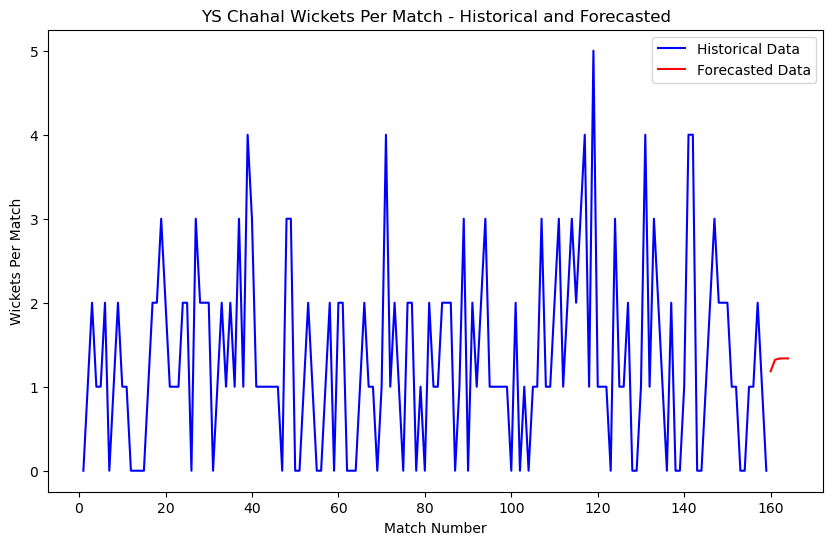

Forecast for YS Chahal:
159    1.184504
160    1.319960
161    1.335451
162    1.337222
163    1.337425
Name: predicted_mean, dtype: float64


C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

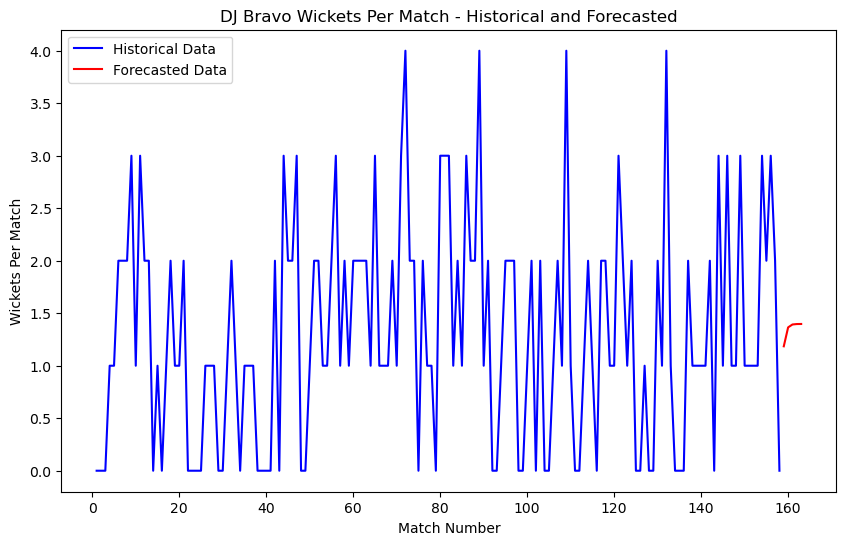

Forecast for DJ Bravo:
158    1.184908
159    1.365293
160    1.392754
161    1.396934
162    1.397571
Name: predicted_mean, dtype: float64


C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

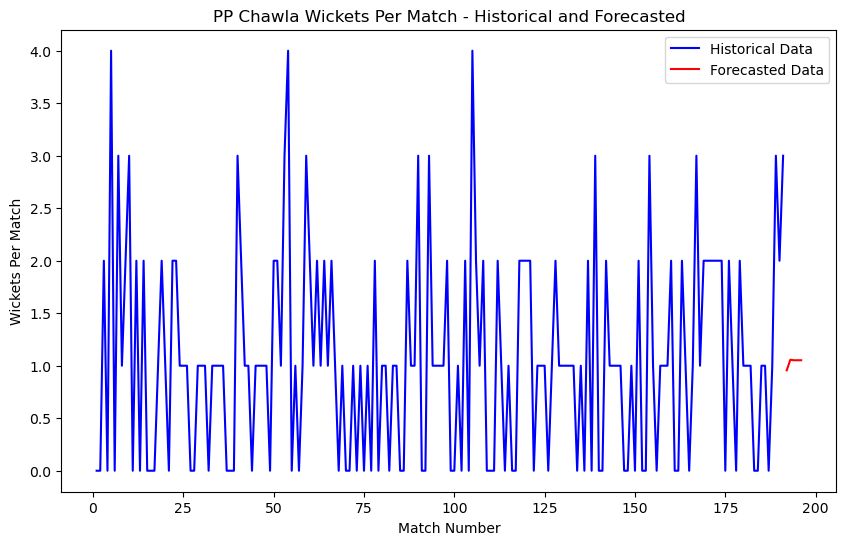

Forecast for PP Chawla:
191    0.956117
192    1.056875
193    1.051908
194    1.052153
195    1.052141
Name: predicted_mean, dtype: float64


C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

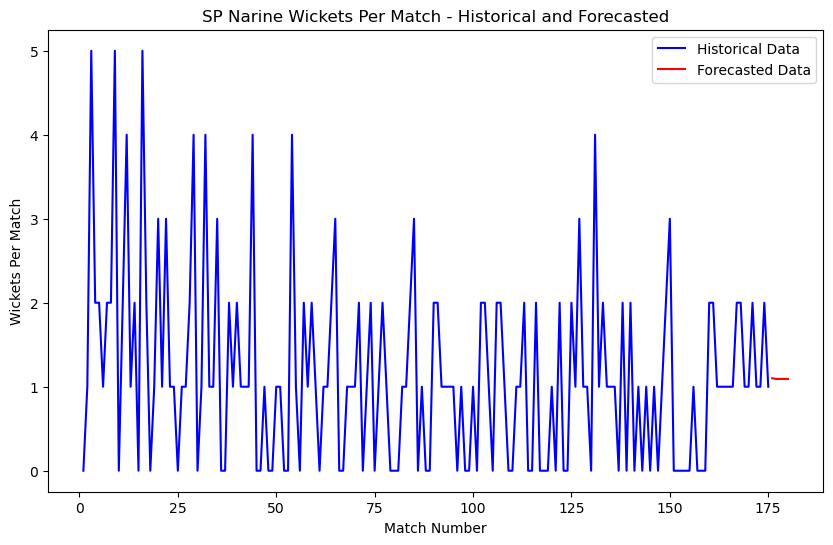

Forecast for SP Narine:
175    1.101301
176    1.091758
177    1.092657
178    1.092572
179    1.092580
Name: predicted_mean, dtype: float64


C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vansh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

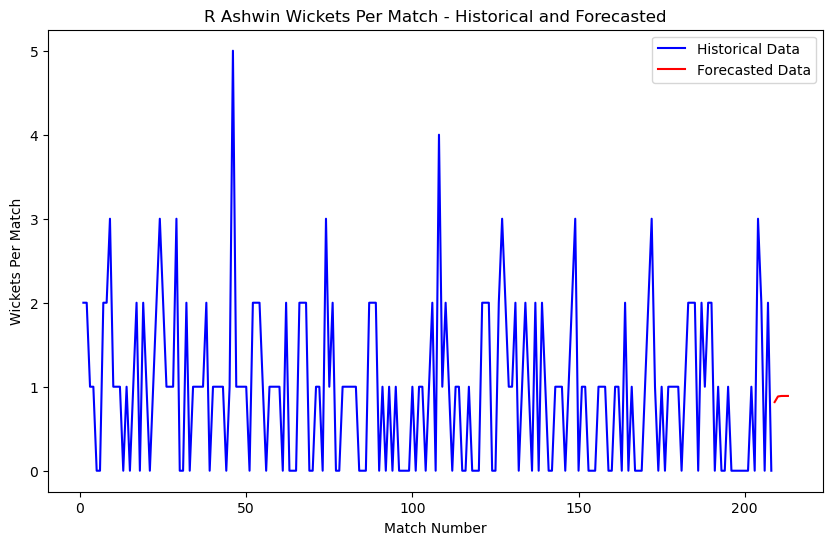

Forecast for R Ashwin:
208    0.817042
209    0.884181
210    0.889698
211    0.890152
212    0.890189
Name: predicted_mean, dtype: float64


In [87]:
forecasts = {}
for bowler in top_bowlers['bowler']:
    selected_bowler_stats = bowler_stats[bowler_stats['bowler'] == bowler]

    selected_bowler_stats = selected_bowler_stats.groupby('match_id').agg(
        wickets_per_match=('total_wickets', 'sum')
    ).reset_index()
    selected_bowler_stats['match_number'] = range(1, len(selected_bowler_stats) + 1)
    selected_bowler_stats.set_index('match_number', inplace=True)

    # Fit the ARIMA model
    model = ARIMA(selected_bowler_stats['wickets_per_match'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecasting
    forecast_steps = 5
    forecast = model_fit.forecast(steps=forecast_steps)
    forecasts[bowler] = forecast

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(selected_bowler_stats['wickets_per_match'], label='Historical Data', color='blue')
    plt.plot(range(len(selected_bowler_stats) + 1, len(selected_bowler_stats) + 1 + forecast_steps),
             forecast, label='Forecasted Data', color='red')
    plt.title(f'{bowler} Wickets Per Match - Historical and Forecasted')
    plt.xlabel('Match Number')
    plt.ylabel('Wickets Per Match')
    plt.legend()
    plt.show()

    # Print forecasted values for the bowler
    print(f"Forecast for {bowler}:")
    print(forecast)
     